# **PA2572 Project Assignment**

## Install Dependencies

In [2]:
!pip install langdetect
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=f3465de2fb2202980a2d5cf9325a4bf735e907908dbcbcfb665326d565d4db62
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
import pandas as pd
import numpy as np
from langdetect import detect
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer,PatternAnalyzer

# **Preprocess**

## Download raw dataset from insideairbnb

In [4]:
!wget https://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2024-03-30/data/reviews.csv.gz
!gzip -d reviews.csv.gz

# !wget https://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2024-03-30/data/calendar.csv.gz
# !gzip -d calendar.csv.gz
# !wget https://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2024-03-30/data/listings.csv.gz
# !gzip -d listings.csv.gz

--2024-05-19 08:09:29--  https://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2024-03-30/data/reviews.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 99.84.252.10, 99.84.252.30, 99.84.252.73, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|99.84.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14027570 (13M) [application/x-gzip]
Saving to: ‘reviews.csv.gz’

reviews.csv.gz      100%[===================>]  13.38M  73.2MB/s    in 0.2s    

2024-05-19 08:09:29 (73.2 MB/s) - ‘reviews.csv.gz’ saved [14027570/14027570]



## Cleaning reviews dataset

In [5]:
# Read the CSV file into a pandas DataFrame
df_r = pd.read_csv("reviews.csv")
# df_l = pd.read_csv("listings.csv")
# df_c = pd.read_csv("calendar.csv")

df_r.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,32984,91258,2010-09-06,200247,Keenan,Great little apartment in the perfect spot in ...
1,32984,95401,2010-09-12,126543,Olaf,Nice flat in a great area. Chris sorted things...
2,32984,273707,2011-05-21,294223,Max,"Great location, Chris was responsive by email ..."
3,32984,285148,2011-05-28,577190,Eli,Chris' place is super great and close to every...
4,32984,308649,2011-06-11,521818,Jonathan,This was a \very nice apartment in a GREAT loc...


In [7]:
# Delete all special character from comments
df_r2 = df_r.copy()
df_r2['comments'] = df_r2['comments'].str.replace('<br/>', '').str.replace('\r', '').str.replace('\n', '')
df_r2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,32984,91258,2010-09-06,200247,Keenan,Great little apartment in the perfect spot in ...
1,32984,95401,2010-09-12,126543,Olaf,Nice flat in a great area. Chris sorted things...
2,32984,273707,2011-05-21,294223,Max,"Great location, Chris was responsive by email ..."
3,32984,285148,2011-05-28,577190,Eli,Chris' place is super great and close to every...
4,32984,308649,2011-06-11,521818,Jonathan,This was a \very nice apartment in a GREAT loc...


### Filter only English comments.

In [7]:
# Don't run this, Download the dataset below

# # Function to detect language
# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return 'unknown'

# df_r_en = df_r2.copy()
# df_r_en = df_r_en[df_r_en['comments'].apply(lambda x: detect_language(str(x)) == 'en')]

# # Reset the index after deleting rows
# df_r_en.reset_index(drop=True, inplace=True)

# print(df_r_en)

# df_r_en.to_csv("reviews_en_3.csv", index=False)

                listing_id                   id        date  reviewer_id  \
0                    32984                91258  2010-09-06       200247   
1                    32984                95401  2010-09-12       126543   
2                    32984               273707  2011-05-21       294223   
3                    32984               285148  2011-05-28       577190   
4                    32984               308649  2011-06-11       521818   
...                    ...                  ...         ...          ...   
84429  1105728587631574590  1115144232840506949  2024-03-18    104354271   
84430  1105728587631574590  1120956685501785052  2024-03-26     38025950   
84431  1110095766950585751  1116580766386199512  2024-03-20    487685014   
84432  1115203614734716506  1119447058933260776  2024-03-24    556425112   
84433  1117171391212689656  1121710886725841333  2024-03-27     28365042   

      reviewer_name                                           comments  
0            K

## Labeling by Textblob

### Download filtered dataset

In [8]:
# !gdown --id 1v5NmYc-_gT04tZdbVDDTgKwPtySTEMII
!gdown --id 1TVUML8b_012jiHJmBJ0P-C59lsv8HD5x

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TVUML8b_012jiHJmBJ0P-C59lsv8HD5x
To: /content/reviews_en_3.csv
100% 25.5M/25.5M [00:00<00:00, 37.9MB/s]


In [9]:
df_r_en = pd.read_csv("reviews_en_3.csv")
df_r_en["comments"] = df_r_en['comments'].astype(str)

In [10]:
# PatternAnalyzer
# The polarity score [-1.0, 1.0]. -1 means negative sentence or 1.0 positive sentence.
# The subjectivity [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

def get_sentiment(text):
  sen = TextBlob(text, analyzer=PatternAnalyzer()).sentiment
  return sen.polarity, sen.subjectivity

# # Apply the function to the DataFrame column
df_r_en[['polarity', 'subject']] = df_r_en['comments'].apply(lambda x: pd.Series(get_sentiment(x)))

df_r_en.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity,subject
0,32984,91258,2010-09-06,200247,Keenan,Great little apartment in the perfect spot in ...,0.349028,0.598889
1,32984,95401,2010-09-12,126543,Olaf,Nice flat in a great area. Chris sorted things...,0.361190,0.651190
2,32984,273707,2011-05-21,294223,Max,"Great location, Chris was responsive by email ...",0.316667,0.508333
3,32984,285148,2011-05-28,577190,Eli,Chris' place is super great and close to every...,0.366922,0.566497
4,32984,308649,2011-06-11,521818,Jonathan,This was a \very nice apartment in a GREAT loc...,0.457341,0.657143


In [20]:
# Save all negative comments to csv to clean manually
df_r_en[df_r_en['polarity'] < -0.1].to_csv("reviews_neg.csv", index=False)

# **Tensorflow Text Classification**

## Download cleaned negative reviews

In [25]:
!gdown --id 1UXYomvse2U6YGi0-sA8iy3hTT3KxczKs

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UXYomvse2U6YGi0-sA8iy3hTT3KxczKs
To: /content/reviews_neg_checked.csv
100% 93.9k/93.9k [00:00<00:00, 82.2MB/s]


In [29]:
df_neg = pd.read_csv("reviews_neg_checked.csv")
df_neg["comments"] = df_neg['comments'].astype(str)
df_neg["sentiment"] = 0
df_neg.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity,subject,sentiment
0,170651,41152961,2015-08-04,18689474,Jérôme,"Heaven then nightmare !!!! I stayed 5 days, i ...",-0.128492,0.646364,0
1,442837,55754147,2015-12-05,39589888,Meshari,- welcoming perfect-excellent location-very sm...,-0.133333,0.300000,0
2,560308,1820886,2012-07-28,2341076,Blanka,We were very dissapointed with the appartment ...,-0.255556,0.634921,0
3,916806,615625816,2020-03-08,10672013,Dániel,The place is well-equipped; e.g. it has a wash...,-0.166667,0.333333,0
4,2647595,470001666487657691,2021-10-10,176006365,Tim,The place and surrounding area is great.Good a...,-0.141667,0.586111,0


## Sample positive reviews

In [13]:
n = df_neg.shape[0]
df_pos = df_r_en[df_r_en['polarity'] > 0.3].sample(n)
df_pos['sentiment'] = 1
df_pos.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity,subject,sentiment
40851,26896182,954191520584972774,2023-08-09,440765506,Camiel,Had a very pleasant stay at the apartment of O...,0.428155,0.685714,1
46040,31302872,767947640945011372,2022-11-25,17817498,Silke,Great stay! Trein station nearby which was ver...,0.625000,0.525000,1
23472,13988429,269258350,2018-05-27,69852258,Mark,Abel's place was great and he's a great host. ...,0.593333,0.662500,1
4011,1048260,610785093,2020-02-25,33024430,Marc,It was a wonderful stay on the Annika’s flat. ...,0.445000,0.565000,1
8851,2880914,286867618,2018-07-07,44779281,Lara,"This is a cozy, well equipped apartment, and o...",0.380000,0.750000,1


## Model Training

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Sample half of the positive and half of the negative samples for both df_pos and df_neg
df_pos_train, df_pos_test = train_test_split(df_pos, test_size=0.2, random_state=42)
df_neg_train, df_neg_test = train_test_split(df_neg, test_size=0.2, random_state=42)

# Combine the sampled dataframes for training and testing
df_train = pd.concat([df_pos_train, df_neg_train])
df_test = pd.concat([df_pos_test, df_neg_test])

# Shuffle the combined dataframes
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Tokenize and pad the text df_r_en
max_words = 10000
max_len = 100

# Tokenize and pad the text for training and testing sets
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df_train['comments'])

train_sequences = tokenizer.texts_to_sequences(df_train['comments'])
test_sequences = tokenizer.texts_to_sequences(df_test['comments'])

X_train = pad_sequences(train_sequences, maxlen=max_len, padding='post')
X_test = pad_sequences(test_sequences, maxlen=max_len, padding='post')

# Create binary sentiment labels for training and testing sets
y_train = df_train['sentiment']
y_test = df_test['sentiment']


# Define a learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with learning rate scheduler
history = model.fit(X_train, y_train, epochs=15, batch_size=8, validation_split=0.2, callbacks=[LearningRateScheduler(scheduler)])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/15
38/38 [==============================] - 18s 236ms/step - loss: 0.6692 - accuracy: 0.5767 - val_loss: 0.5166 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 2/15
38/38 [==============================] - 6s 144ms/step - loss: 0.2473 - accuracy: 0.9433 - val_loss: 0.2706 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 3/15
38/38 [==============================] - 6s 159ms/step - loss: 0.1494 - accuracy: 0.9567 - val_loss: 0.2175 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 4/15
38/38 [==============================] - 7s 183ms/step - loss: 0.0838 - accuracy: 0.9767 - val_loss: 0.1637 - val_accuracy: 0.9474 - lr: 9.0484e-04
Epoch 5/15
38/38 [==============================] - 5s 143ms/step - loss: 0.0460 - accuracy: 0.9900 - val_loss: 0.1483 - val_accuracy: 0.9474 - lr: 8.1873e-04
Epoch 6/15
38/38 [==============================] - 9s 252ms/step - loss: 0.0743 - accuracy: 0.9767 - val_loss: 0.2762 - val_accuracy: 0.9342 - lr: 7.4082e-04
Epoch 7/15
38/38 [==============================] - 6s 15

## Model Evaluation

3/3 [==============================] - 0s 91ms/step
Accuracy: 0.9166666666666666
Sensitivity: 0.875
Specificity: 0.9583333333333334


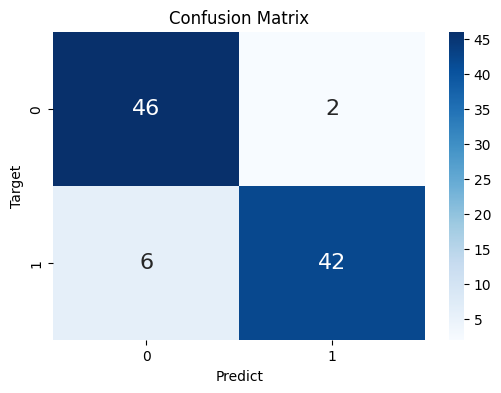

In [46]:
# import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Convert Pandas Series to NumPy arrays
y_test_array = y_test.values
y_pred_classes_array = y_pred_classes.flatten()

# Calculate True Positives, False Positives, True Negatives, False Negatives
TP = np.sum((y_pred_classes_array == 1) & (y_test_array == 1))
FP = np.sum((y_pred_classes_array == 1) & (y_test_array == 0))
TN = np.sum((y_pred_classes_array == 0) & (y_test_array == 0))
FN = np.sum((y_pred_classes_array == 0) & (y_test_array == 1))

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print the results
print(f'Accuracy: {(TP + TN) / (TP+TN+FN+FP)}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

# Calculate the confusion matrix
cm = confusion_matrix(y_test_array, y_pred_classes_array)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predict')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

### False Postive Prediction

In [34]:
# False Postive
df_test[(y_pred_classes_array == 1) & (y_test_array == 0)]

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity,subject,sentiment
1,13648486,662844367658055962,2022-07-03,191387637,Troy,We obeyed house rules and did not bring alcoho...,-0.101562,0.765104,0
58,41896424,491124837382859069,2021-11-08,8779496,Angelina,We came for an event to Stockholm and stayed f...,-0.143000,0.369000,0


### False Negative Prediction

In [35]:
# False Negative
df_test[(y_pred_classes_array == 0) & (y_test_array == 1)]

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity,subject,sentiment
9,49899724,428703355720155168,2021-08-14,234418017,Yvan,Susanne's place is just fabulous. The location...,0.616667,0.900000,1
17,30251993,388830076415360151,2021-06-20,102896913,Fernando,The apartment resulted somethingSmaller we tho...,0.333333,1.000000,1
28,13648486,150822917,2017-05-09,11606084,Peter,This is a beautifully decorated house in a con...,0.553125,0.650000,1
45,164448,39189367,2015-07-21,16947432,Gianmarco,Lidia was very kind and gave us directions to ...,0.339333,0.606667,1
51,21193417,704790004,2020-10-29,263219433,Sanne,"Sarah's apartment is beautiful, stylish and bi...",0.424333,0.671556,1
69,25471993,347877139,2018-11-12,10900180,Dinis,Great relation price for what you get!,1.000000,0.750000,1


In [41]:
# @title Test your own comments
my_comments = "I would rather stay at home." # @param {type:"string"}

test_sequences = tokenizer.texts_to_sequences([my_comments])
padded_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post')

y_pred_test = model.predict(padded_sequences)
y_res = (y_pred_test > 0.5).astype(int)

print(y_pred_test)
print("Negative" if y_pred_test[0][0] <= 0.5 else "Positive")
#y_res[0]

1/1 [==============================] - 0s 173ms/step
[[0.01608336]]
Negative
